<a href="https://colab.research.google.com/github/skhanduri79/Predicting-Flight-prices/blob/main/fligth_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.4 MB


In [ ]:
# data pre-process and preparation


In [ ]:
data = df.copy()

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
# deriving new data from date of journey. It should be time stamp feature. we will derive, day, month, year from the date.

In [ ]:
def change_into_dateTime(col):
  data[col]=pd.to_datetime(data[col])

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
  change_into_dateTime(feature)

In [ ]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [ ]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [ ]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [ ]:
# extracting minutes and hours from date time columns

In [ ]:
def extract_hour_min(df,col):
  df[col+"_hour"] = df[col].dt.hour
  df[col+"minute"] = df[col].dt.minute
  return df.head(3)

In [ ]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-14 05:50:00,2025-02-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-14 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [ ]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-14 05:50:00,2025-02-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-14 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-14 05:50:00,2025-02-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
data.shape

(10682, 18)

In [ ]:
# analysing when most flights take off

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'journey_year', 'Dep_Time_hour', 'Dep_Timeminute', 'Arrival_Time_hour',
       'Arrival_Timeminute'],
      dtype='object')

In [ ]:
def flight_departure_time(x):
  if (x>4) and (x<=8):
    return "Early Morning"
  elif (x>8) and (x<=12):
    return "Morning"
  elif (x>12) and (x<=16):
    return "Noon"
  elif (x>16) and (x<=20):
    return "Evening"
  elif (x>20) and (x<=24):
    return "Night"
  else:
    return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

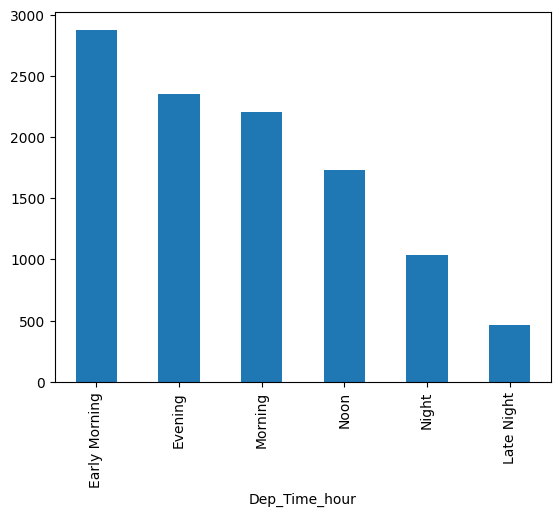

In [ ]:
data["Dep_Time_hour"].apply(flight_departure_time).value_counts().plot(kind="bar")

In [ ]:
!pip install plotly
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs

init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
data["Dep_Time_hour"].apply(flight_departure_time).value_counts().iplot(kind="bar",color = "green")

In [ ]:
def preprocess_duration(x):
  if 'h' not in x:
    x = '0h' + ' ' + x
  elif 'm' not in x:
    x = x + " "+ '0m'
  return x

In [ ]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [ ]:
data["duration_hours"] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [ ]:
data["duration_min"] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,duration_hours,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-14 05:50:00,2025-02-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [ ]:
# analysing wheather duration effects the flight prices

In [ ]:
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [ ]:
data['Duration_total_min']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'journey_year', 'Dep_Time_hour', 'Dep_Timeminute', 'Arrival_Time_hour',
       'Arrival_Timeminute', 'duration_hours', 'duration_min',
       'Duration_total_min'],
      dtype='object')

In [ ]:
# both the features: prices and duration are continuous, we can plot a scatter plot/regression plot

<Axes: xlabel='Duration_total_min', ylabel='Price'>

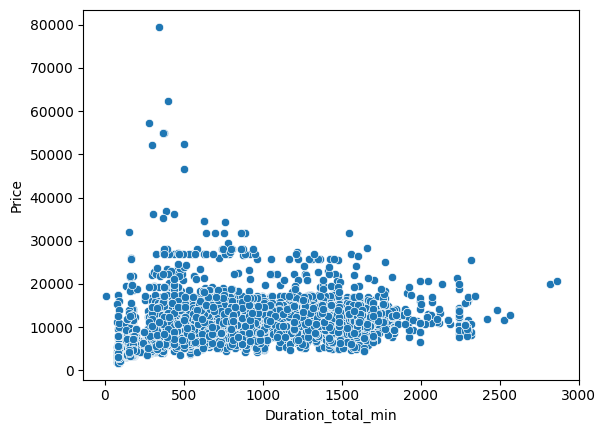

In [ ]:
sns.scatterplot(x="Duration_total_min",y="Price",data=data)

<Axes: xlabel='Duration_total_min', ylabel='Price'>

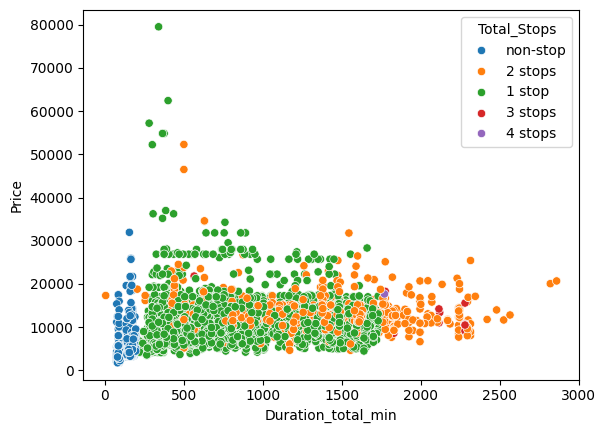

In [ ]:
sns.scatterplot(x="Duration_total_min",y="Price",data=data, hue='Total_Stops')

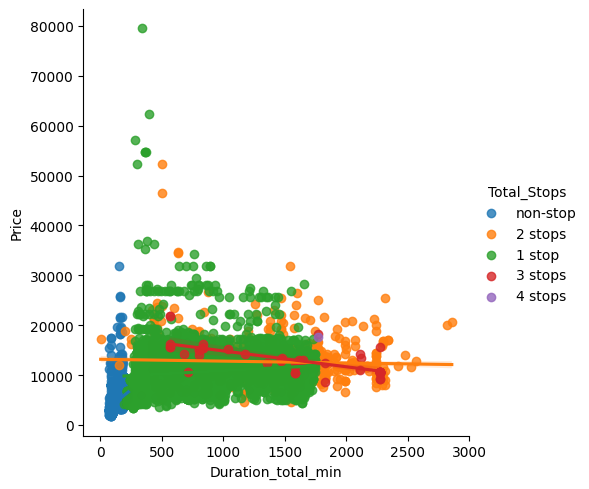

In [ ]:
sns.lmplot(x="Duration_total_min",y="Price",data=data, hue='Total_Stops')

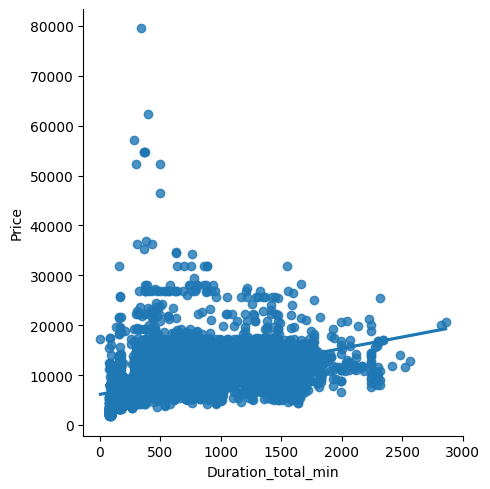

In [ ]:
sns.lmplot(x="Duration_total_min",y="Price",data=data)

In [ ]:
# duration increases, price increases

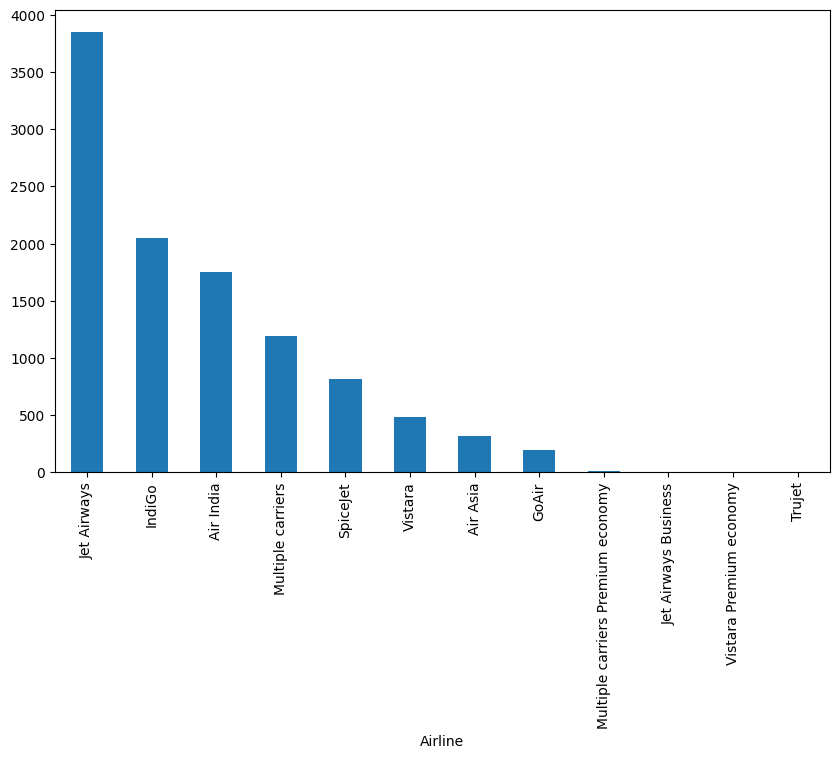

In [ ]:
# mpost popular airline

plot = data['Airline'].value_counts().plot(kind='bar',figsize=(10,6))

In [ ]:
# on which route is jet airways popularly used?

In [ ]:
# data respect to jet airways

data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


In [ ]:
# for each airline, price values variation

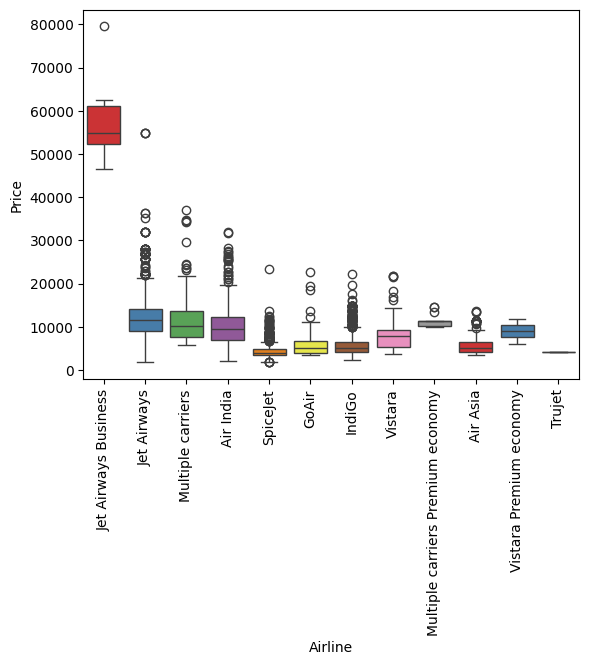

<Figure size 1500x1000 with 0 Axes>

In [ ]:
sns.boxplot(x='Airline',y='Price', data=data.sort_values('Price',ascending=False),palette='Set1')
plt.xticks(rotation='vertical')
plt.figure(figsize=(15,10))
plt.show()

In [ ]:
# converting string/categorical data to numerical features is one-hot encoding.

In [ ]:
# nominal data-> one-hot encoding, eg: source, destination
# ordinal data -> label oncoding, eg: total stops
# categorical data-> feature encoding

In [ ]:
cat_col = [col for col in data.columns if data[col].dtype=='object']

In [ ]:
num_col = [col for col in data.columns if data[col].dtype!='object']

In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
for sub_category in data['Source'].unique():
  data["source_" + sub_category]= data['Source'].apply(lambda x: 1 if x==sub_category else 0)

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Timeminute,duration_hours,duration_min,Duration_total_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-14 05:50:00,2025-02-14 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-14 09:25:00,2025-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
data['Airline'].nunique()

12

In [ ]:
# lets do target guided encoding



In [ ]:
# assigining importance based on prices average to airlines

In [ ]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict_airlines = {key:index for index, key in enumerate(airlines,0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [ ]:
data['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
 data['Destination'].replace('New Delhi','Delhi', inplace = True)

In [ ]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest = {key:index for index, key in enumerate(dest,0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination'] = data['Destination'].map(dict_dest)

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Timeminute,duration_hours,duration_min,Duration_total_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2025-02-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,2025-02-14 05:50:00,2025-02-14 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,2025-02-14 09:25:00,2025-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
# removing the unncessary features

In [ ]:
data['Total_Stops']

,Total_Stops
0,non-stop
1,2 stops
2,2 stops
3,1 stop
4,1 stop
...,...
10678,non-stop
10679,non-stop
10680,non-stop
10681,non-stop


In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# we can do label encoding for this as this is ordinal data using sklearn label encoder

# we can do manually also without the library

In [ ]:
stop= {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}


In [ ]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Timeminute,duration_hours,duration_min,Duration_total_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2025-02-14 22:20:00,2025-03-22 01:10:00,2h 50m,0,No info,...,1,10,2,50,170,1,0,0,0,0


In [ ]:
data['Additional_Info'].value_counts()/len(data)*100

,count
Additional_Info,
No info,78.112713
In-flight meal not included,18.554578
No check-in baggage included,2.995694
1 Long layover,0.177869
Change airports,0.065531
Business class,0.037446
No Info,0.028085
1 Short layover,0.009362
Red-eye flight,0.009362


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'journey_year', 'Dep_Time_hour', 'Dep_Timeminute', 'Arrival_Time_hour',
       'Arrival_Timeminute', 'duration_hours', 'duration_min',
       'Duration_total_min', 'source_Banglore', 'source_Kolkata',
       'source_Delhi', 'source_Chennai', 'source_Mumbai'],
      dtype='object')

In [ ]:
data.drop(columns=['Date_of_Journey', 'Additional_Info','Duration_total_min', 'Source','journey_year' , 'Route','Duration' ], axis=1, inplace=True)

In [ ]:
data.head(2)

,Airline,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,duration_hours,duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,2025-02-14 22:20:00,2025-03-22 01:10:00,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2025-02-14 05:50:00,2025-02-14 13:15:00,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [ ]:
# outlier detection and removal

In [ ]:
def plot(df,col):
  fig, (ax1, ax2, ax3) = plt.subplots(3,1)
  sns.distplot(df[col], ax=ax1)
  sns.boxplot(df[col], ax=ax2, orient='h')
  sns.distplot(df[col], ax=ax3, kde= False)

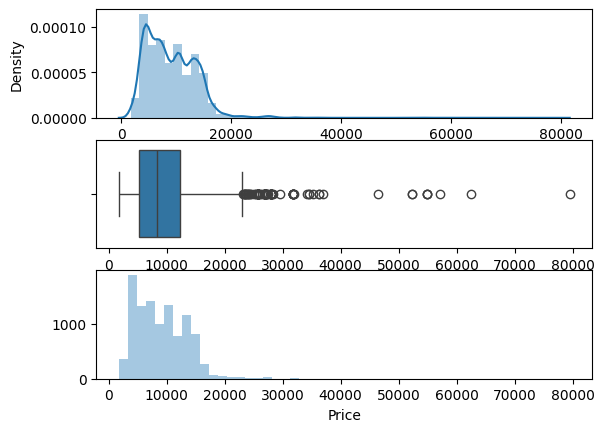

In [ ]:
plot(data,'Price')

In [ ]:
q1 = data['Price'].quantile(0.75)
q3 = data['Price'].quantile(0.25)

iqr = q3-q1
maximum = q3 + 1.5*iqr
minimum  = q1 - 1.5*iqr

In [ ]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[3897, 7662, 13882, 6218, 13302, 3873, 11087, 22270, 11087, 8625, 8907, 4174, 4667, 9663, 4804, 14011, 5830, 10262, 13381, 12898, 19495, 6955, 3943, 4823, 7757, 13292, 8238, 7682, 4668, 3687, 3687, 13227, 4423, 10919, 12373, 5894, 4649, 6245, 19225, 14924, 9646, 8714, 12373, 3383, 13062, 3527, 3943, 4667, 6117, 11150, 7202, 12121, 4377, 3943, 4483, 14231, 17345, 7414, 8073, 12395, 8366, 5117, 12524, 7191, 3687, 5894, 5403, 3625, 10861, 6297, 5678, 9134, 10791, 12819, 6893, 7240, 3898, 4049, 10262, 3332, 10844, 7229, 13941, 5894, 10197, 13712, 5636, 13014, 7064, 10703, 9646, 17057, 13817, 13748, 4880, 3540, 3257, 6478, 8040, 14300, 14781, 14939, 10262, 6528, 6121, 13029, 11421, 7574, 11596, 15129, 13555, 5780, 9397, 17024, 5281, 10348, 12677, 15147, 4668, 15554, 3971, 3100, 9663, 27430, 3540, 10676, 13044, 14388, 3943, 3597, 5932, 10262, 6216, 4804, 14067, 15129, 13376, 10441, 4030, 17024, 13017, 6686, 5636, 6442, 9486, 10844, 15318, 5117, 6147, 7005, 3873, 9270, 3898, 14781, 8586, 1069

In [ ]:
data['Price'] = np.where(data['Price']>35000, data['Price'].median(), data['Price'] )

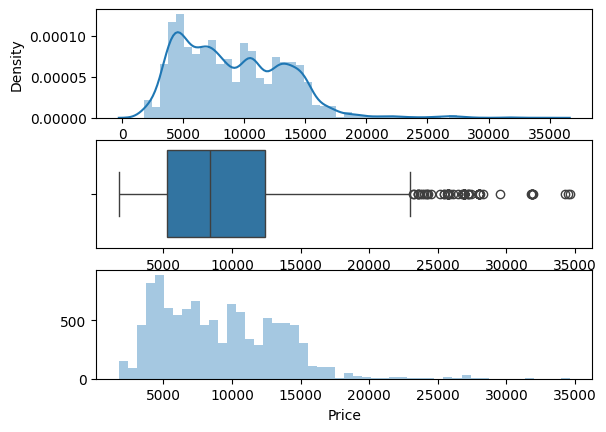

In [ ]:
plot(data,'Price')

In [ ]:
# feature selection

In [ ]:
# using mutual information matric for random variables for feature selection

In [ ]:
X= data.drop(['Price'], axis=1)

y  = data['Price']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# Convert datetime columns to numerical representation (e.g., Unix timestamp)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64') // 10**9  # Convert to Unix timestamp

imp = mutual_info_regression(X,y)

In [ ]:
imp = mutual_info_regression(X,y)

In [ ]:
imp

array([1.32267061, 1.06838582, 1.99765204, 2.12324183, 0.79468627,
       0.38033877, 0.62100441, 0.92125355, 0.75834659, 1.14310816,
       0.90339261, 1.12446461, 0.67639332, 0.38650949, 0.45640558,
       0.530233  , 0.13343887, 0.19876829])

In [ ]:
imp_df = pd.DataFrame(imp, index = X.columns)

In [ ]:
imp_df.columns = ['importance']

In [ ]:
imp_df

,importance
Airline,1.322671
Destination,1.068386
Dep_Time,1.997652
Arrival_Time,2.123242
Total_Stops,0.794686
journey_day,0.380339
journey_month,0.621004
Dep_Time_hour,0.921254
Dep_Timeminute,0.758347
Arrival_Time_hour,1.143108


In [ ]:
imp_df.sort_values(by = 'importance', ascending=False)

,importance
Arrival_Time,2.123242
Dep_Time,1.997652
Airline,1.322671
Arrival_Time_hour,1.143108
duration_hours,1.124465
Destination,1.068386
Dep_Time_hour,0.921254
Arrival_Timeminute,0.903393
Total_Stops,0.794686
Dep_Timeminute,0.758347


In [ ]:
 # building a predictive model now

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
y_pred

array([16898.87,  5501.98,  8945.55, ...,  3523.52,  6074.14,  6801.16])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(y_test, y_pred)

0.8167333574489822

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3567761.629210698
R-squared: 0.8167333574489822


<Axes: >

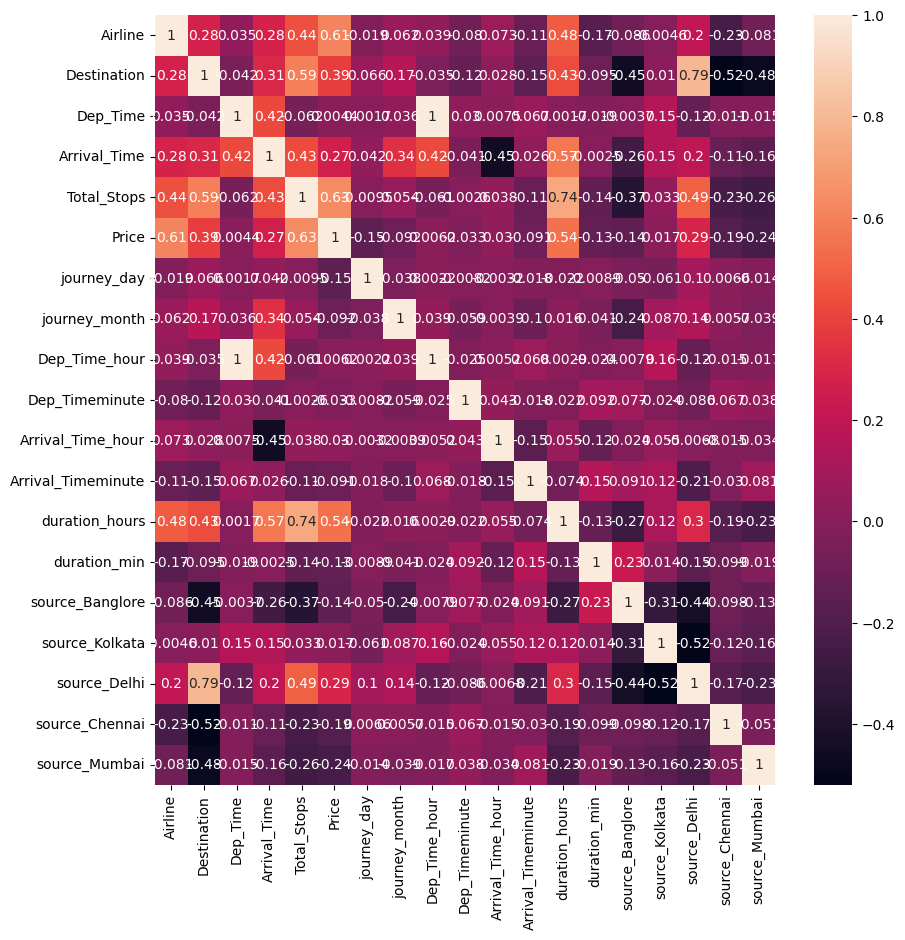

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

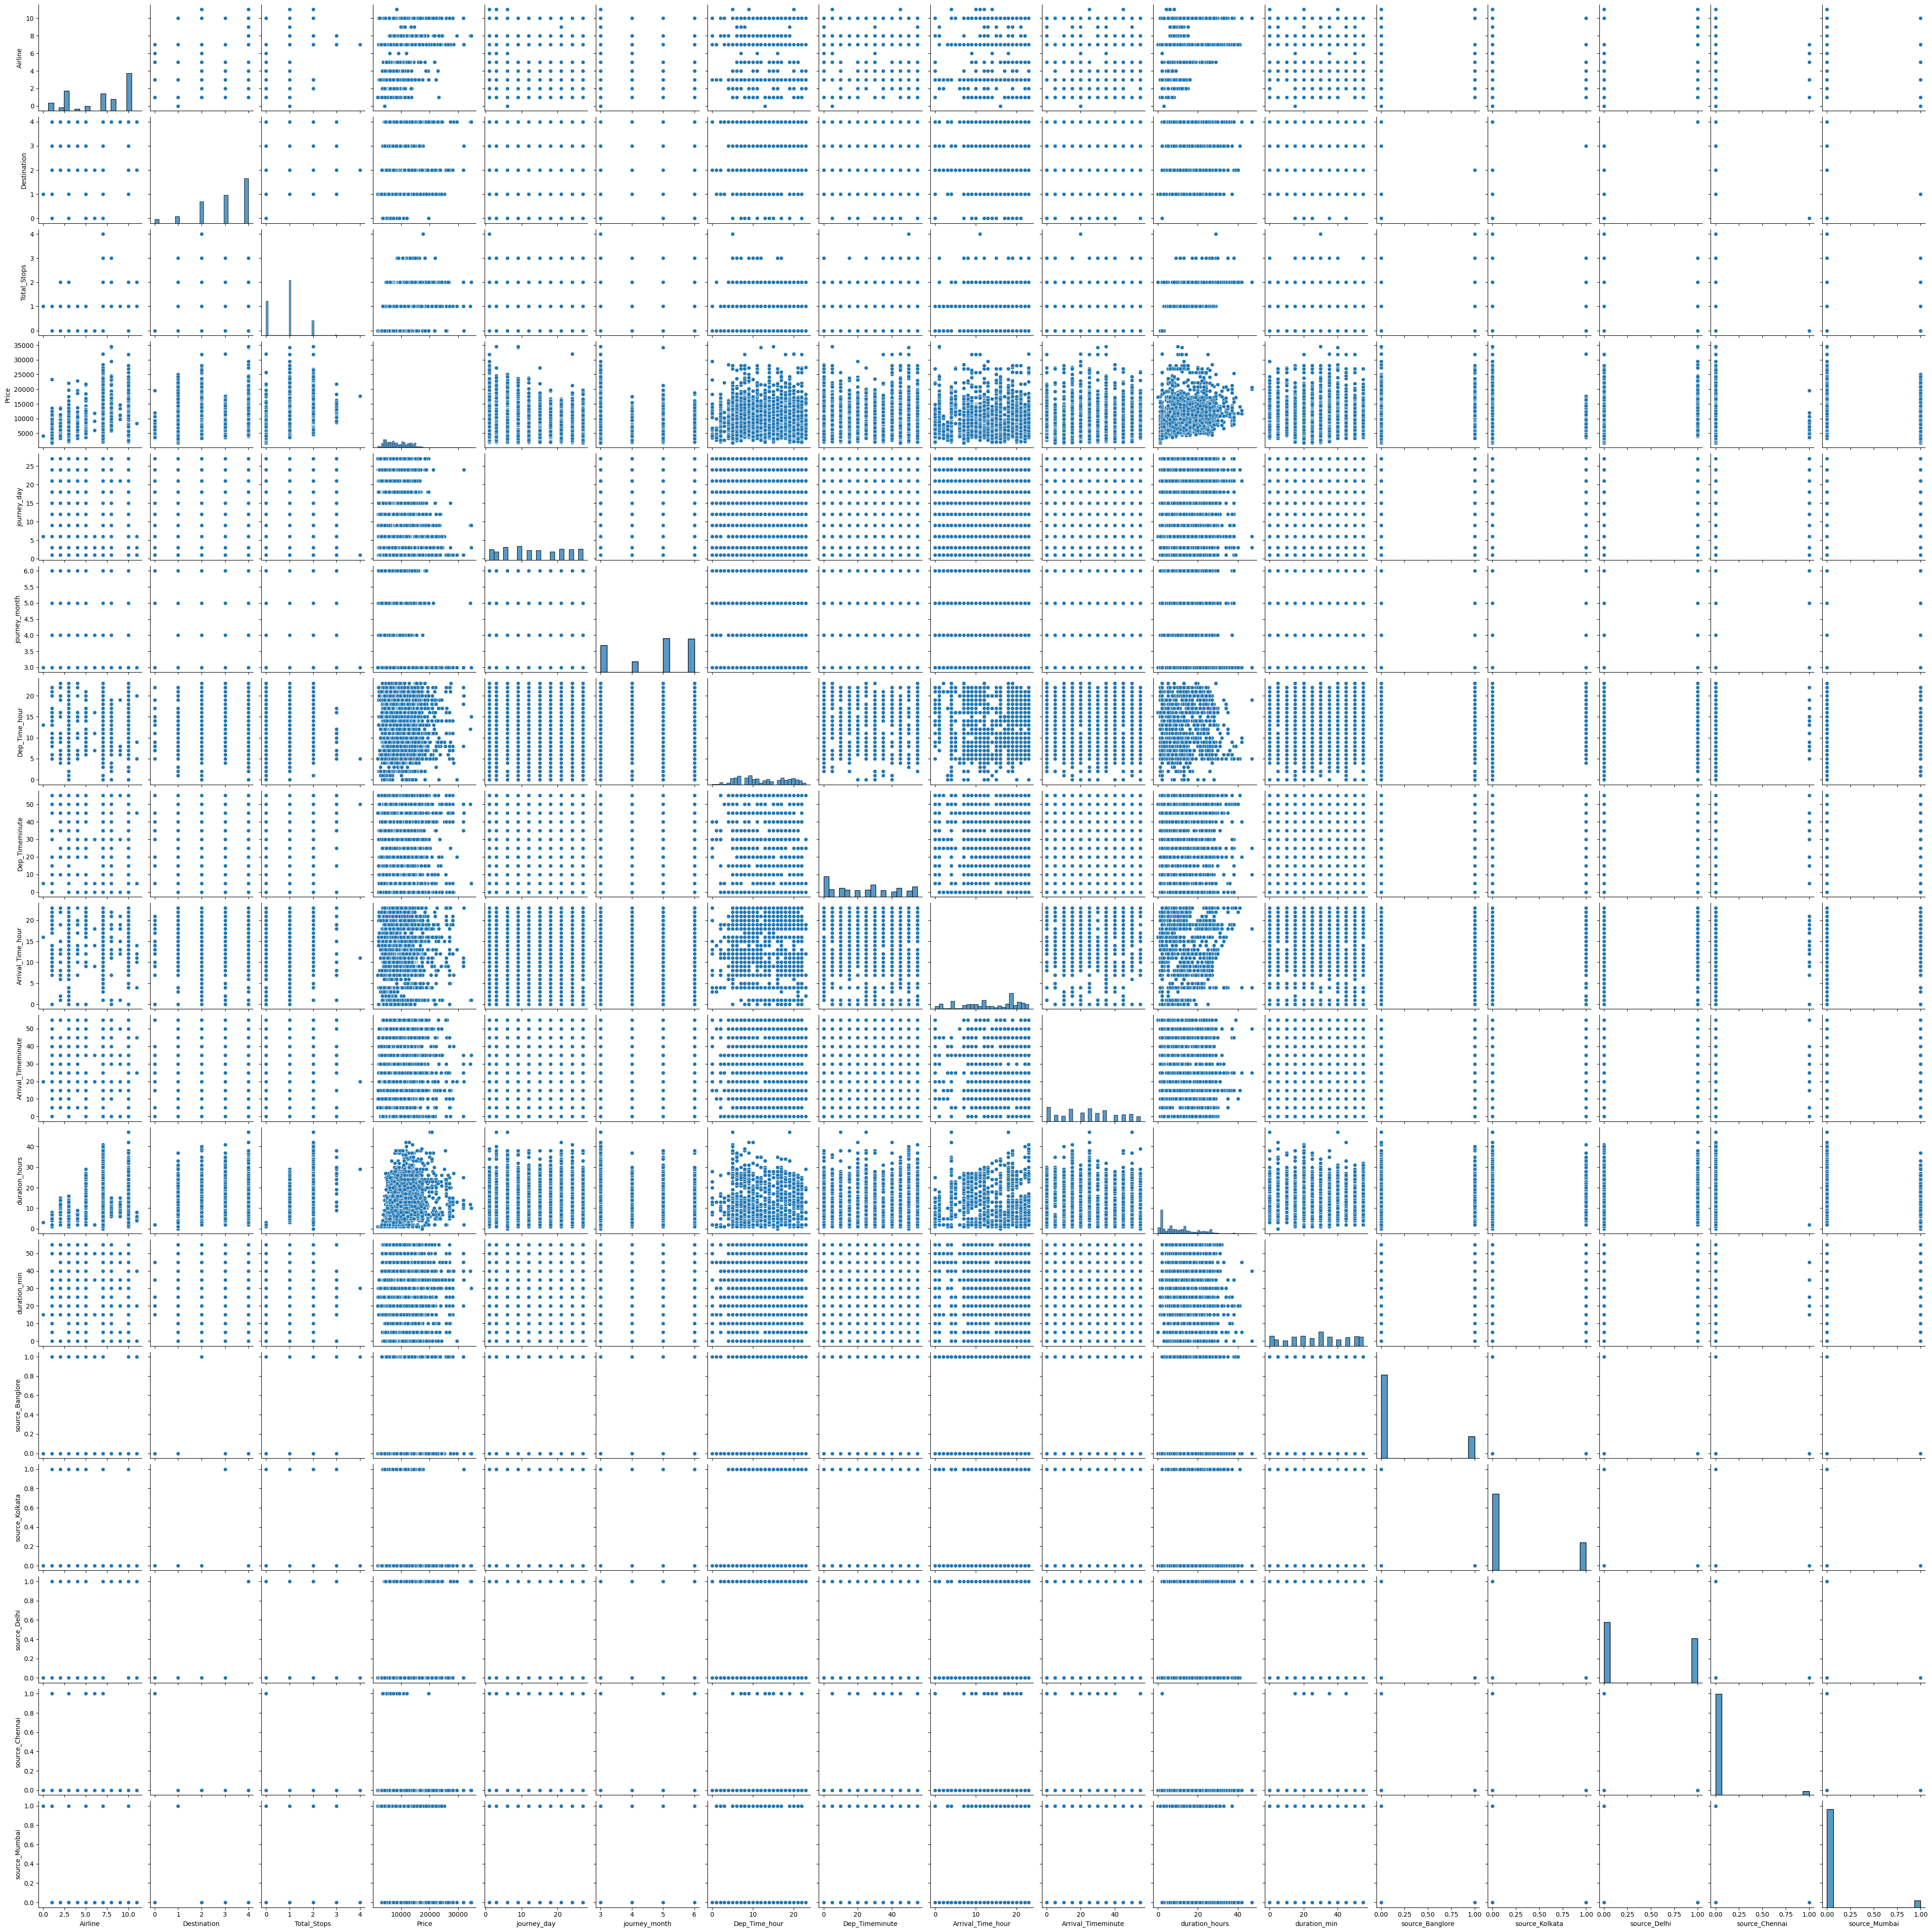

In [ ]:
sns.pairplot(data)

In [ ]:
# automating the model evaluation

In [ ]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))* 100

In [ ]:
mape(y_test, y_pred)

12.960310826888099

In [ ]:
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  print("Training Score:{} ", format(model.score(X_train, y_train)))
  y_prediction = model.predict(X_test)
  print('Predictions are : {}', format(y_prediction))
  print('\n')
  r2_score = metrics.r2_score(y_test, y_prediction)
  print('r2_score value is : {}', format(r2_score))
  print('MAE value is : {}', format(metrics.mean_absolute_error(y_test, y_prediction)))
  print('MSE value is : {}', format(metrics.mean_squared_error(y_test, y_prediction)))
  print('RMSE value is : {}', format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
  print('MAPE value is : {}', format(mape(y_test, y_prediction)))
  sns.distplot(y_test-y_prediction)
  plt.show()

Training Score:{}  0.9518043836612655
Predictions are : {} [16893.13  5435.47  8854.38 ...  3474.86  6191.7   6865.54]


r2_score value is : {} 0.8159331845645601
MAE value is : {} 1165.320143669135
MSE value is : {} 3583339.0745877624
RMSE value is : {} 1892.9709650672835
MAPE value is : {} 13.09570256673653


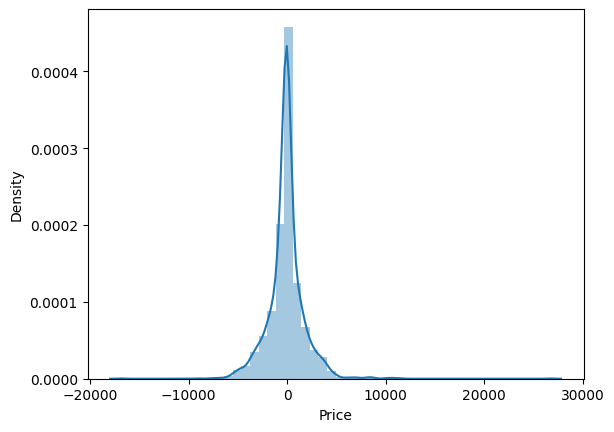

In [ ]:
predict(RandomForestRegressor())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Training Score:{}  0.9666671938797454
Predictions are : {} [16840.  4959.  9187. ...  3419.  5797.  6818.]


r2_score value is : {} 0.7028612413791975
MAE value is : {} 1341.4906714089602
MSE value is : {} 5784578.3979126625
RMSE value is : {} 2405.1150487892805
MAPE value is : {} 14.839345866508898


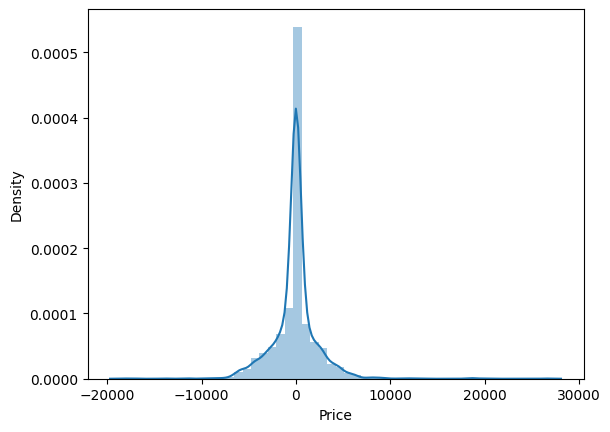

In [ ]:
predict(DecisionTreeRegressor())

In [ ]:
from sklearn.linear_model import LinearRegression

Training Score:{}  0.5968749678873477
Predictions are : {} [12724.20729771  8152.25111446  8972.81909641 ...  3441.04057652
  8792.85392502  7685.28708001]


r2_score value is : {} 0.5720590692115236
MAE value is : {} 2010.3702076107572
MSE value is : {} 8330982.721041606
RMSE value is : {} 2886.344179241555
MAPE value is : {} 24.81634713262876


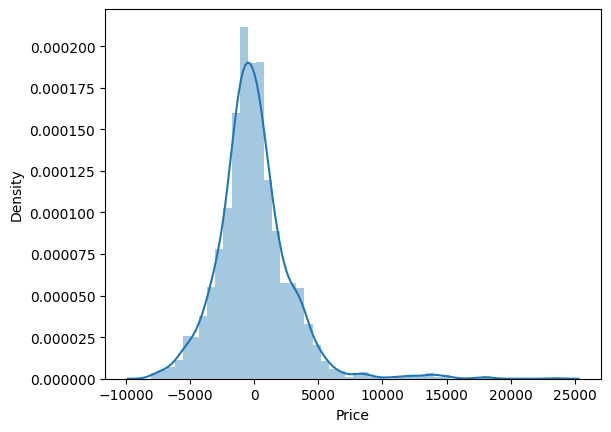

In [ ]:
predict(LinearRegression())

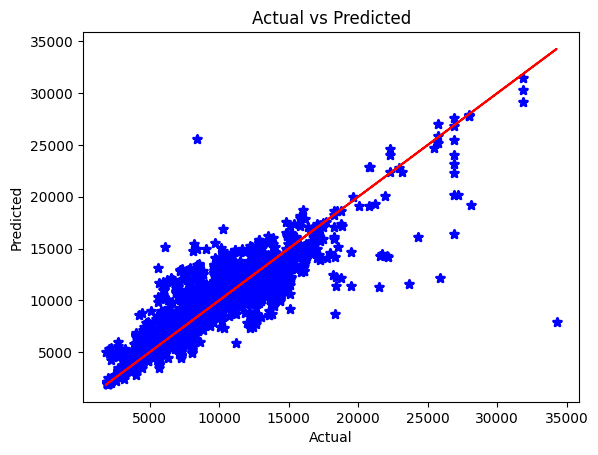

In [ ]:
plt.scatter(y_test, y_pred,  color='blue', linewidth=2,marker='*')
plt.title('Actual vs Predicted')
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# hypertuning machine learning model
# define the ml algo
# make dictionary of the hyperparameters
# using hyperparameter space, fitting of training data is done

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
reg_rf = RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num=4)]

min_samples_split = [5,10,15,100]

In [ ]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [ ]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, verbose=2, random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   6.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   7.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   6.3s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   7.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=   7.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=   8.2s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=980; total time=   7.7s
[CV] END max_depth=21, max_featur

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=980)

In [ ]:
rf_random.best_score_

0.803880929783316

In [ ]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}